In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\ANKUSH\Desktop\AI ML\ML\Datasets\Car_price_train.csv')

In [3]:
df.sample(4)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3009,3009,Tata New Safari DICOR 2.2 EX 4x4 BS IV,Jaipur,2012,75391,Diesel,Manual,First,13.93 kmpl,2179 CC,138 bhp,7.0,NaN,3.75
1621,1621,Skoda Fabia 1.2 TDI Ambition,Kolkata,2012,98000,Diesel,Manual,First,20.86 kmpl,1199 CC,73.9 bhp,5.0,NaN,2.51
3593,3593,Ford Fiesta 1.4 Duratec ZXI,Jaipur,2007,125000,Petrol,Manual,Third,16.6 kmpl,1388 CC,68 bhp,5.0,NaN,1.50
2242,2242,Toyota Fortuner 2.8 4WD MT,Hyderabad,2010,110000,Diesel,Manual,First,14.24 kmpl,2755 CC,174.5 bhp,7.0,37.51 Lakh,13.70


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [5]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [6]:
df['Mileage'] = df['Mileage'].str.split('k').str[0]

In [7]:
df['Mileage']

0        26.6 
1       19.67 
2        18.2 
3       20.77 
4        15.2 
         ...  
6014     28.4 
6015     24.4 
6016     14.0 
6017     18.9 
6018    25.44 
Name: Mileage, Length: 6019, dtype: object

In [8]:
df['Mileage'] = df['Mileage'].astype('float')

In [9]:
np.mean(df['Mileage'])

18.134960943992024

In [10]:
df['Mileage'] = df['Mileage'].fillna(df['Mileage'].mean())

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6019 non-null   float64
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 658.5+ KB


In [12]:
df['Engine'] = df['Engine'].str.split('C').str[0]

In [13]:
df.sample(3)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
5251,5251,BMW 3 Series 320d Highline,Mumbai,2008,66000,Diesel,Automatic,Second,16.07,1995,181 bhp,5.0,NaN,7.25
4920,4920,Maruti Wagon R LXI CNG,Pune,2014,58000,CNG,Manual,First,26.60,998,58.16 bhp,5.0,NaN,3.00
2102,2102,Toyota Corolla H5,Mumbai,2007,67000,Petrol,Manual,Third,13.40,1794,125 bhp,5.0,NaN,2.20


In [14]:
df['Engine'] = df['Engine'].fillna(df['Engine'].median())

In [15]:
df['Engine'] = df['Engine'].astype('int64')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6019 non-null   float64
 9   Engine             6019 non-null   int64  
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(4), object(7)
memory usage: 658.5+ KB


In [17]:
# df['Power'].apply(lambda x: x.split('b')[0])
df['Power'] = df['Power'].str.split('b').str[0]

In [18]:
# df['Power'].fillna(df['Power'].mean())

In [19]:
df['Power'] = pd.to_numeric(df['Power'],errors='coerce')

In [20]:
df['Power']  = df['Power'].fillna(df['Power'].mean())

In [21]:
df['Power'] = df['Power'].astype('float')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6019 non-null   float64
 9   Engine             6019 non-null   int64  
 10  Power              6019 non-null   float64
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(4), int64(4), object(6)
memory usage: 658.5+ KB


In [23]:
df.sample(2)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1763,1763,Chevrolet Cruze LTZ,Mumbai,2011,65000,Diesel,Manual,First,17.9,1998,163.7,5.0,NaN,4.55
1752,1752,Mahindra XUV500 W8 2WD,Delhi,2012,88000,Diesel,Manual,First,16.0,2179,140.0,7.0,NaN,5.99


In [24]:
df['Seats'].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

In [25]:
df['Seats'] = df['Seats'].fillna(df['Seats'].mean())

In [26]:
df['Seats'] = df['Seats'].astype('int64')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6019 non-null   float64
 9   Engine             6019 non-null   int64  
 10  Power              6019 non-null   float64
 11  Seats              6019 non-null   int64  
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(5), object(6)
memory usage: 658.5+ KB


In [28]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [29]:
df.sample(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2474,Mercedes-Benz CLA 200 CDI Style,Coimbatore,2017,23106,Diesel,Automatic,First,17.9,2143,136.0,5,NaN,27.43
4600,Ford Ikon 1.3 Flair,Kochi,2009,66484,Petrol,Manual,First,13.8,1299,70.0,5,NaN,1.65
5168,Maruti Wagon R LXI,Jaipur,2007,71000,Petrol,Manual,Second,18.9,998,67.1,5,NaN,1.50


In [30]:
df['Owner_Type'].value_counts()

Owner_Type
First             4929
Second             968
Third              113
Fourth & Above       9
Name: count, dtype: int64

In [31]:
df['Owner_Type'] = df['Owner_Type'].map({'First':1 ,'Second':2 , 'Third':3, 'Fourth & Above':4})

In [32]:
df['Owner_Type'] = df['Owner_Type'].astype('int64')

In [33]:
df['Fuel_Type'].value_counts()

Fuel_Type
Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: count, dtype: int64

In [34]:
df[df['Fuel_Type']=='Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,1,18.134961,72,41.0,5,13.58 Lakh,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,1,18.134961,1798,73.0,5,NaN,12.75


In [35]:
# df['Fuel_Type'] = df[df['Fuel_Type']!=('4446','4904')]
df = df[~df['Fuel_Type'].isin(['Electric','LPG'])]


In [36]:
df['Fuel_Type'].value_counts()

Fuel_Type
Diesel    3205
Petrol    2746
CNG         56
Name: count, dtype: int64

In [37]:
dummies = pd.get_dummies(df['Fuel_Type'],drop_first=True,dtype='float')

In [38]:
df = pd.concat([dummies,df],axis=1)

In [39]:
df.head(3)

,Diesel,Petrol,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0.0,0.0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,1,26.60,998,58.16,5,NaN,1.75
1,1.0,0.0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,1,19.67,1582,126.20,5,NaN,12.50
2,0.0,1.0,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,1,18.20,1199,88.70,5,8.61 Lakh,4.50


In [40]:
df.drop('Fuel_Type',axis=1,inplace=True)

In [41]:
df.drop('New_Price',axis=1,inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6007 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Diesel             6007 non-null   float64
 1   Petrol             6007 non-null   float64
 2   Name               6007 non-null   object 
 3   Location           6007 non-null   object 
 4   Year               6007 non-null   int64  
 5   Kilometers_Driven  6007 non-null   int64  
 6   Transmission       6007 non-null   object 
 7   Owner_Type         6007 non-null   int64  
 8   Mileage            6007 non-null   float64
 9   Engine             6007 non-null   int64  
 10  Power              6007 non-null   float64
 11  Seats              6007 non-null   int64  
 12  Price              6007 non-null   float64
dtypes: float64(5), int64(5), object(3)
memory usage: 657.0+ KB


In [43]:
df['Transmission'].value_counts()

Transmission
Manual       4289
Automatic    1718
Name: count, dtype: int64

In [44]:
dummies2  = pd.get_dummies(df['Transmission'],drop_first=True,dtype='float')

In [45]:
df = pd.concat([df,dummies2],axis=1)

In [46]:
df.drop('Transmission',axis=1,inplace=True)

In [47]:
df.head(3)

,Diesel,Petrol,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Manual
0,0.0,0.0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,1,26.60,998,58.16,5,1.75,1.0
1,1.0,0.0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,1,19.67,1582,126.20,5,12.50,1.0
2,0.0,1.0,Honda Jazz V,Chennai,2011,46000,1,18.20,1199,88.70,5,4.50,1.0


In [48]:
df['Location'].value_counts()

Location
Mumbai        788
Hyderabad     736
Kochi         651
Coimbatore    636
Pune          621
Delhi         554
Kolkata       535
Chennai       493
Jaipur        411
Bangalore     358
Ahmedabad     224
Name: count, dtype: int64

In [49]:
df.drop('Location',axis=1,inplace=True)

In [50]:
df['company'] = df['Name'].str.split(' ').str[0]

In [51]:
def remove_name(g):
    Name = g['Name']
    company  = g['company']
    if Name.startswith(company):
        return Name[len(company):].strip()
    else:
        return Name
    

In [52]:
df['rename'] = df.apply(remove_name,axis=1)

In [53]:
df.drop('Name',axis=1,inplace=True)

In [54]:
df.head(2)

,Diesel,Petrol,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Manual,company,rename
0,0.0,0.0,2010,72000,1,26.60,998,58.16,5,1.75,1.0,Maruti,Wagon R LXI CNG
1,1.0,0.0,2015,41000,1,19.67,1582,126.20,5,12.50,1.0,Hyundai,Creta 1.6 CRDi SX Option


In [55]:
df['company'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [56]:
top_10_categories = df['company'].value_counts().head(10).index
top_10_categories

Index(['Maruti', 'Hyundai', 'Honda', 'Toyota', 'Mercedes-Benz', 'Volkswagen',
       'Ford', 'Mahindra', 'BMW', 'Audi'],
      dtype='object', name='company')

In [57]:
df['company'] = df['company'].apply(lambda x: x if x in top_10_categories else 'others')

In [58]:
df.head(3)

,Diesel,Petrol,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Manual,company,rename
0,0.0,0.0,2010,72000,1,26.60,998,58.16,5,1.75,1.0,Maruti,Wagon R LXI CNG
1,1.0,0.0,2015,41000,1,19.67,1582,126.20,5,12.50,1.0,Hyundai,Creta 1.6 CRDi SX Option
2,0.0,1.0,2011,46000,1,18.20,1199,88.70,5,4.50,1.0,Honda,Jazz V


In [59]:
df.shape

(6007, 13)

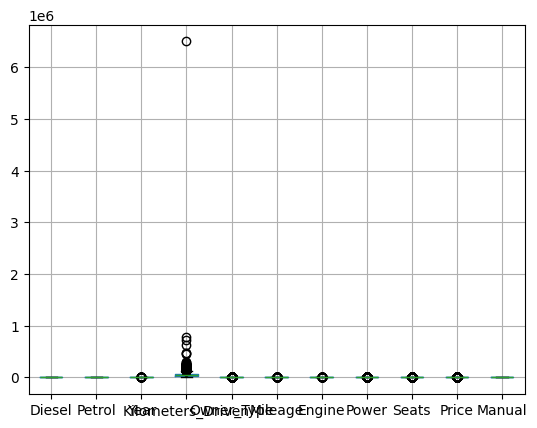

In [60]:
df.boxplot()
plt.show()

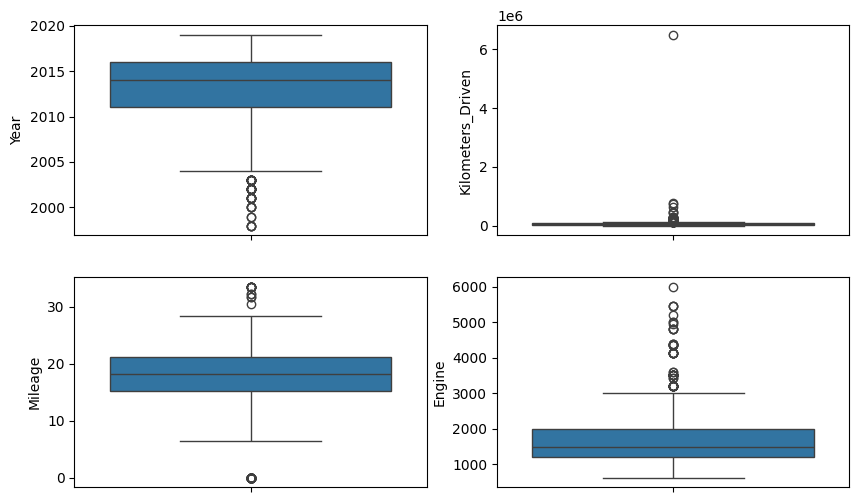

In [61]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
sns.boxplot(df['Year'])

plt.subplot(2,2,2)
sns.boxplot(df['Kilometers_Driven'])

plt.subplot(2,2,3)
sns.boxplot(df['Mileage'])

plt.subplot(2,2,4)
sns.boxplot(df['Engine'])
plt.show()

In [62]:
df['Year'][df['Year'] < df['Year'].quantile(0.01)]

274     2002
315     2000
364     2003
613     2000
631     2002
911     2003
1221    2003
1224    1999
1318    2002
1845    1999
1903    2002
1907    2002
1999    2001
2487    2003
2524    2003
2554    2002
2656    2002
2737    2001
3138    1998
3189    2002
3221    2002
3228    2003
3749    1998
3806    2001
3854    2003
3942    2002
3963    2001
4143    2003
4152    2003
4351    2003
4629    2001
4658    2003
4709    1998
4712    2003
4730    2003
4791    2003
4822    2002
4863    2001
5040    2003
5137    2000
5270    2002
5432    2002
5453    2001
5643    2003
5647    2001
5657    2002
5716    1998
5914    2003
5926    2000
5943    2002
Name: Year, dtype: int64

In [63]:
df = df[~df['Year'].isin([2002,2000,2003,1998,2001,2004,1999,2005])]

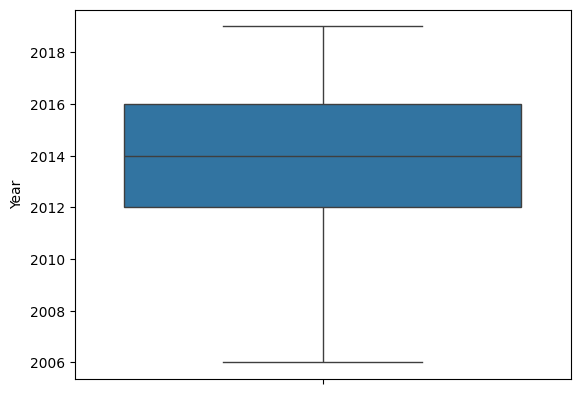

In [64]:
sns.boxplot(df['Year'])
plt.show()

In [65]:
df.shape

(5869, 13)

In [66]:
df['Mileage'][df['Mileage'] > df['Mileage'].quantile(0.99)]

17      28.40
53      28.40
275     28.40
879     28.40
892     28.40
1247    28.40
1269    33.44
1301    28.40
1332    33.54
1519    28.40
1756    28.40
1794    28.40
1844    28.40
1920    28.40
1934    28.40
1990    28.40
2059    33.54
2094    28.40
2151    28.40
2290    28.40
2371    33.54
2438    28.40
2519    28.40
2701    31.79
2715    28.40
2759    28.40
3012    28.40
3040    28.40
3119    32.26
3129    33.54
3173    28.40
3239    28.40
3524    28.40
3553    33.44
3582    28.40
3786    28.40
3869    33.44
3889    28.40
4141    33.54
4147    28.40
4328    28.40
4495    28.40
4769    33.44
4934    28.40
5086    28.40
5178    31.79
5265    28.40
5375    28.40
5505    28.40
5507    28.40
5710    30.46
5935    32.26
5940    28.40
6014    28.40
Name: Mileage, dtype: float64

In [67]:
dummy = df['Mileage']

In [68]:
ls= list(map(lambda x : int(dummy.mean()) if x>28.40 else x , dummy))

In [69]:
df['Mileage'] = ls

In [70]:
df['Mileage'].quantile(0.0009)

0.0

In [71]:
df = df[~df['Mileage'].isin([7.751719999999999,0.0])]

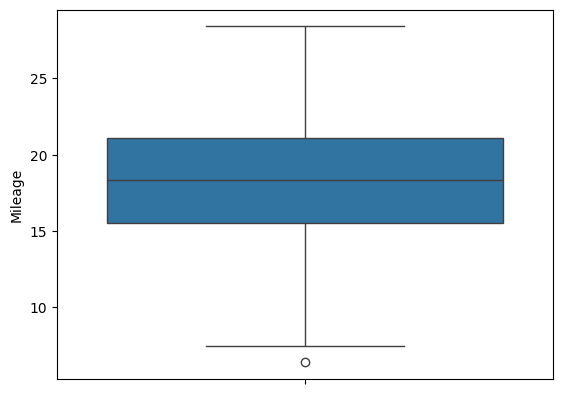

In [72]:
sns.boxplot(df['Mileage'])
plt.show()

In [73]:
df['Engine'][df['Engine'] > df['Engine'].quantile(0.99)]
# print(df['Engine'].mean())

70      4806
152     5461
459     4134
586     4134
589     3498
693     3498
703     3198
798     3498
806     3198
926     3436
1038    4367
1076    3198
1093    4134
1352    4367
1430    3198
1596    4134
1724    3198
1930    3498
2100    4806
2305    3436
2588    3200
2669    3198
2978    4806
3028    3198
3065    3498
3079    3198
3115    3198
3196    3198
3242    4367
3341    4395
3580    3498
3999    3197
4039    3498
4136    3498
4227    3198
4342    3498
4388    4134
4451    4951
4559    4134
4627    4395
4691    5461
4722    5461
4821    4395
4869    4367
4906    3198
4938    4134
5088    5000
5278    3198
5323    3198
5341    4134
5414    3498
5416    4367
5441    3198
5521    5998
5603    4806
5728    3498
5781    5204
5885    3498
5919    5000
Name: Engine, dtype: int64

In [74]:
dummy2 = df['Engine']

In [75]:
ls2 = list(map(lambda x: dummy2.mean() if x>3197 else x, dummy2))

In [76]:
df['Engine'] = ls2

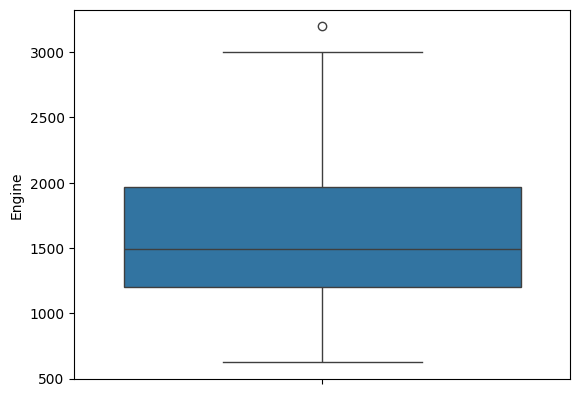

In [77]:
sns.boxplot(df['Engine'])
plt.show()

In [78]:
df['Kilometers_Driven'].value_counts()

Kilometers_Driven
60000    79
45000    69
65000    65
55000    58
50000    58
         ..
28937     1
82085     1
68465     1
63854     1
27365     1
Name: count, Length: 3037, dtype: int64

In [79]:
print(df['Kilometers_Driven'].mean())
print(df['Kilometers_Driven'].median())

57849.32932279134
52000.5


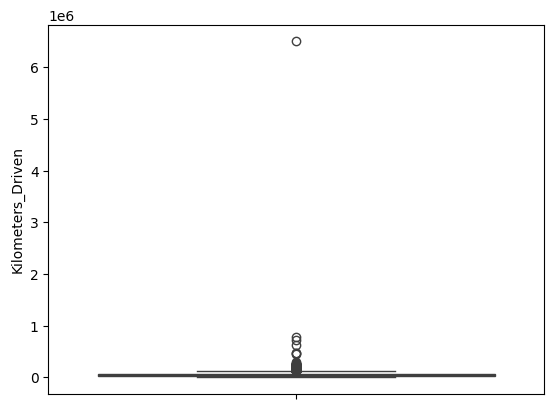

In [80]:
sns.boxplot(df['Kilometers_Driven'])
plt.show()

In [81]:
df['Kilometers_Driven'].quantile(0.01)

4003.06

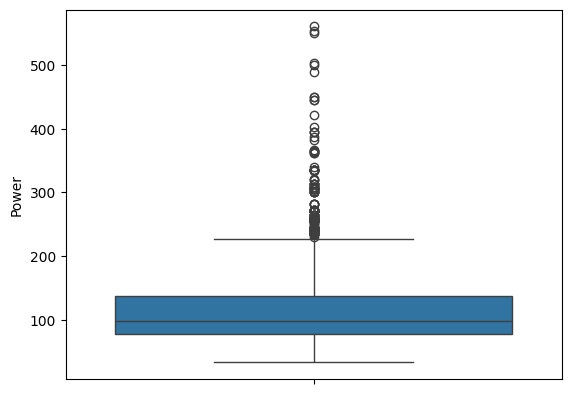

In [82]:

sns.boxplot(df['Power'])
plt.show()

In [83]:
df['Power'][df['Power'] > df['Power'].quantile(0.97)]

38      254.80
70      500.00
107     270.90
134     362.07
148     444.00
         ...  
5868    245.00
5885    272.00
5919    488.10
5946    258.00
6008    300.00
Name: Power, Length: 174, dtype: float64

In [84]:
dummy3 = df['Power']

In [85]:
ls3 = list(map(lambda x: int(dummy3.mean()) if x>230 else x, dummy3))

In [86]:
df['Power'] = ls3

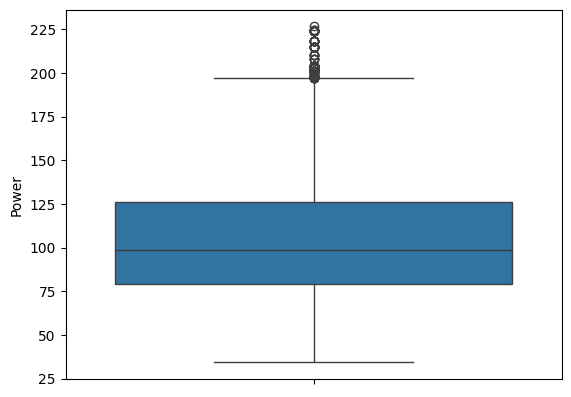

In [87]:
sns.boxplot(df['Power'])
plt.show()

In [88]:
df['Seats'].value_counts()

Seats
5     4880
7      672
8      123
4       94
6       28
2       15
9        3
10       2
0        1
Name: count, dtype: int64

In [89]:
df = df[~df['Seats'].isin([0,10,9,2])]

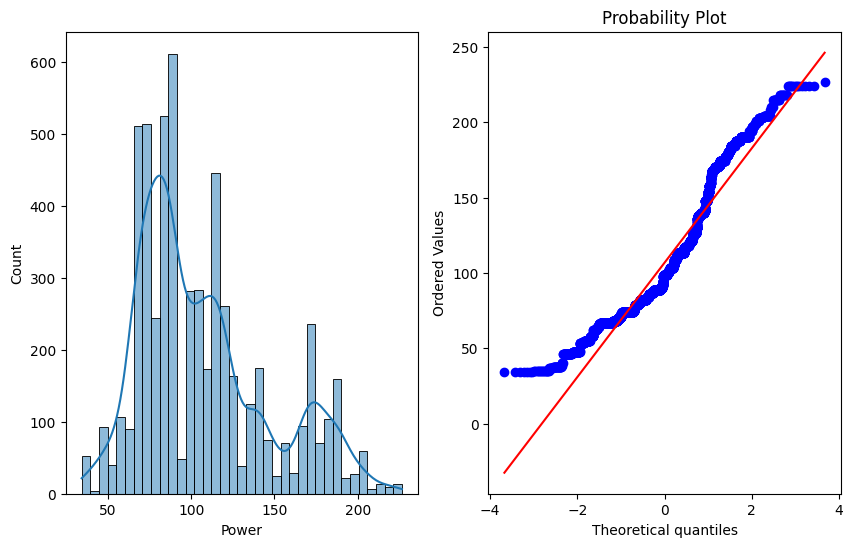

In [90]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(df['Power'],kde =True)

plt.subplot(1,2,2)
stat.probplot(df['Power'],plot=plt)
plt.show()

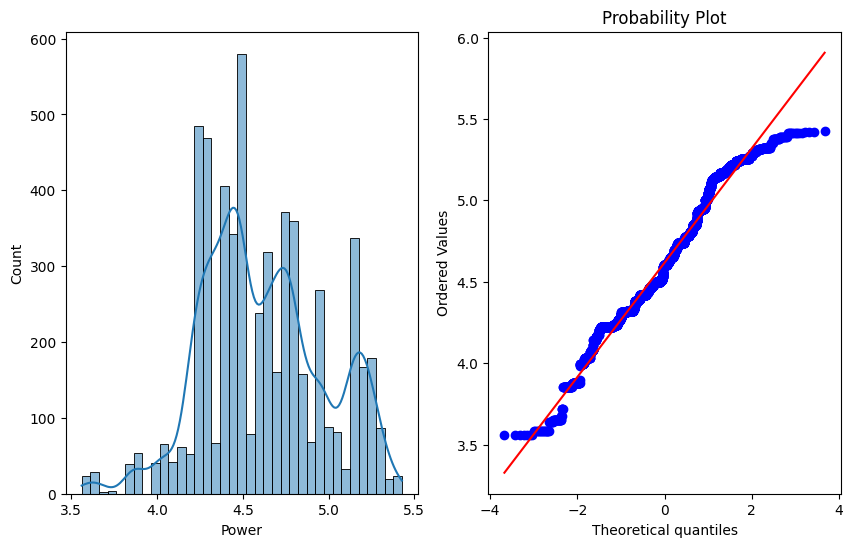

In [91]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(np.log1p(df['Power']),kde =True)

plt.subplot(1,2,2)
stat.probplot(np.log1p(df['Power']),plot=plt)
plt.show()

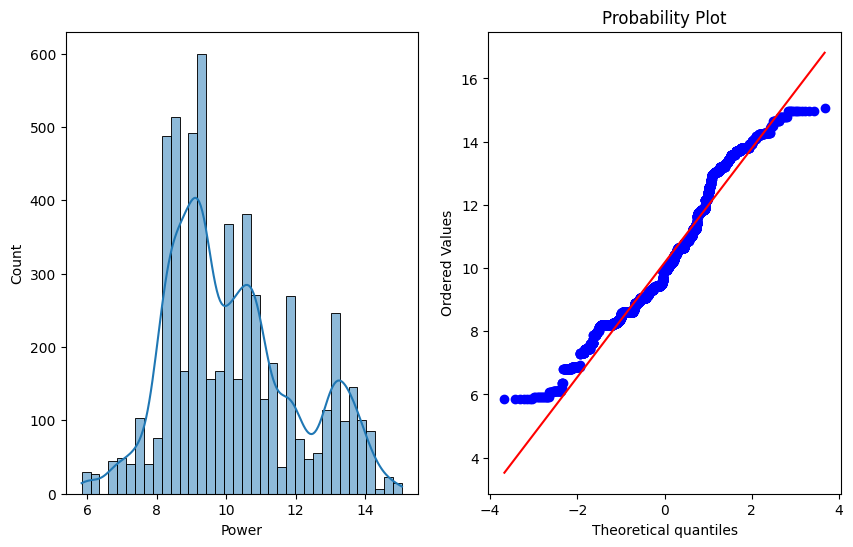

In [92]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(np.sqrt(df['Power']),kde =True)

plt.subplot(1,2,2)
stat.probplot(np.sqrt(df['Power']),plot=plt)
plt.show()

In [93]:
from scipy.stats import boxcox

In [94]:
ptr, plam = boxcox(df['Power'])

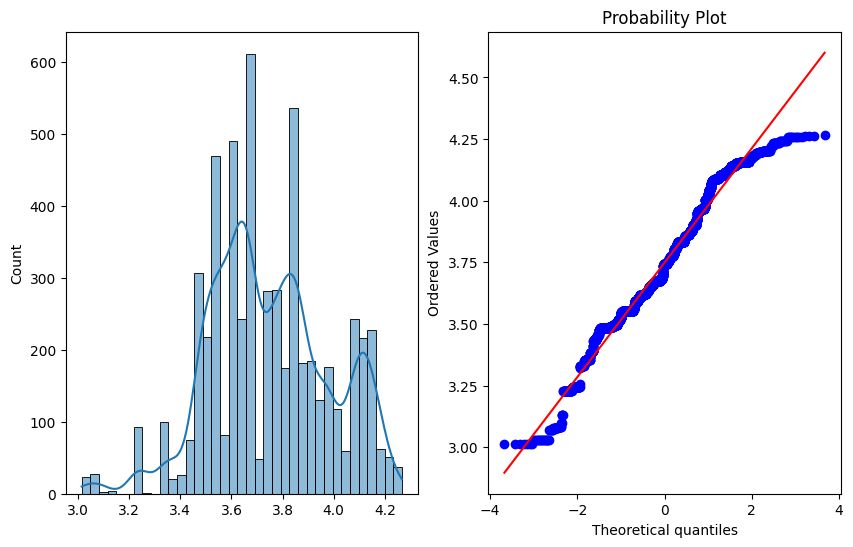

In [95]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(ptr,kde =True)

plt.subplot(1,2,2)
stat.probplot(ptr,plot=plt)
plt.show()

In [96]:
df['new_power'] = ptr

In [97]:
df.drop('Power',axis=1,inplace=True)

In [98]:
df.head(3)

,Diesel,Petrol,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Seats,Price,Manual,company,rename,new_power
0,0.0,0.0,2010,72000,1,26.60,998.0,5,1.75,1.0,Maruti,Wagon R LXI CNG,3.388271
1,1.0,0.0,2015,41000,1,19.67,1582.0,5,12.50,1.0,Hyundai,Creta 1.6 CRDi SX Option,3.902102
2,0.0,1.0,2011,46000,1,18.20,1199.0,5,4.50,1.0,Honda,Jazz V,3.672771


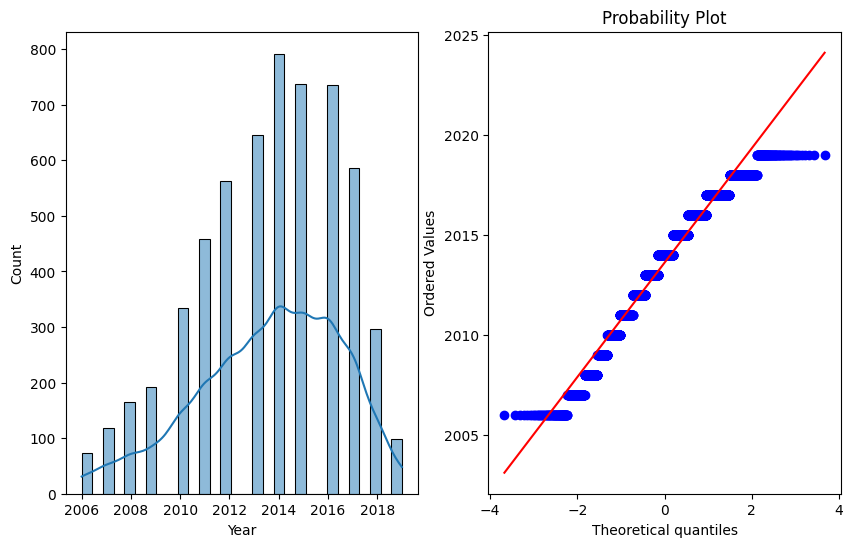

In [99]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(df['Year'],kde =True)

plt.subplot(1,2,2)
stat.probplot(df['Year'],plot=plt)
plt.show()

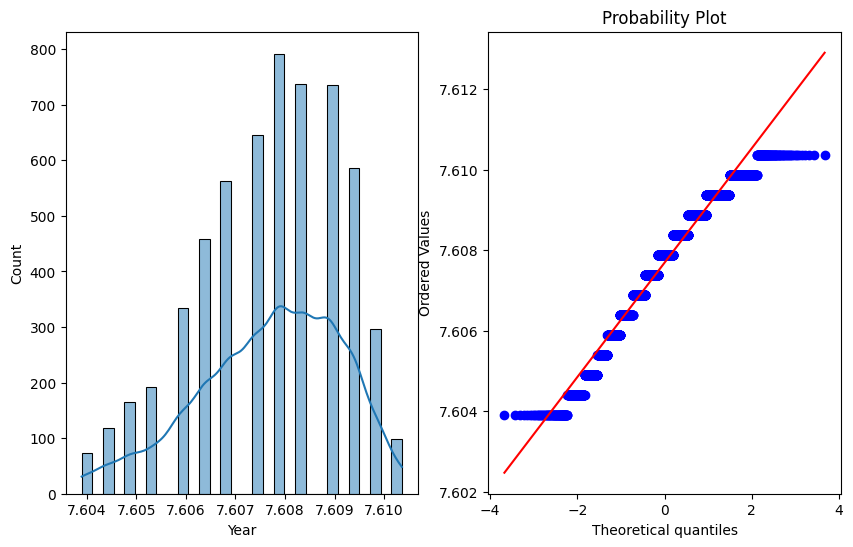

In [100]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(np.log(df['Year']),kde =True)

plt.subplot(1,2,2)
stat.probplot(np.log(df['Year']),plot=plt)
plt.show()

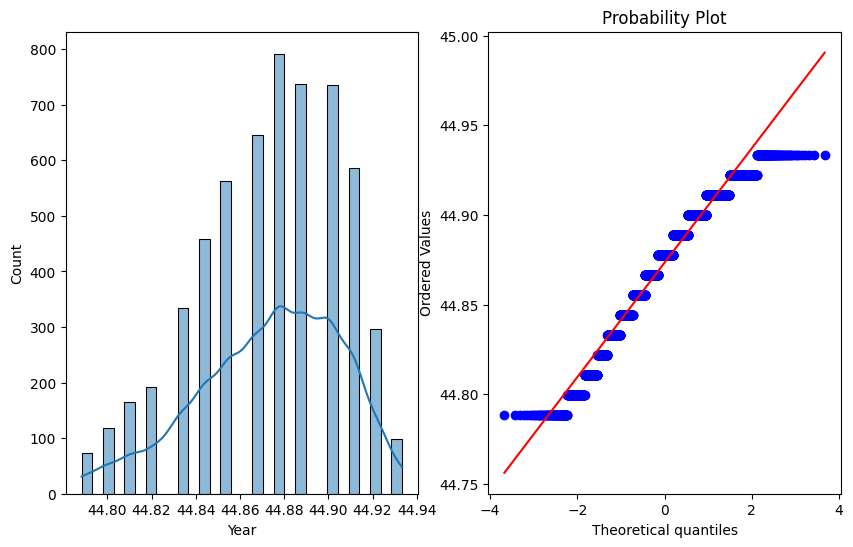

In [101]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(np.sqrt(df['Year']),kde =True)

plt.subplot(1,2,2)
stat.probplot(np.sqrt(df['Year']),plot=plt)
plt.show()

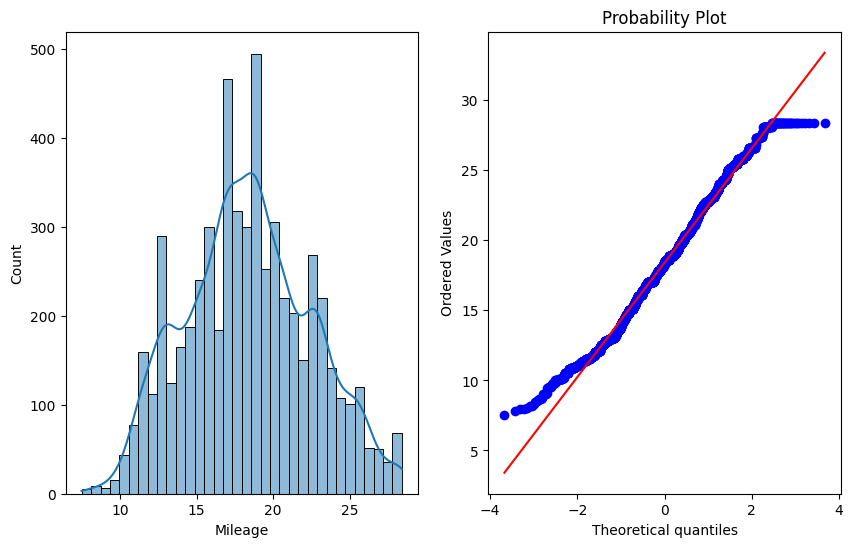

In [102]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(df['Mileage'],kde =True)

plt.subplot(1,2,2)
stat.probplot(df['Mileage'],plot=plt)
plt.show()

In [103]:
mtr , mlam = boxcox(df['Mileage'])

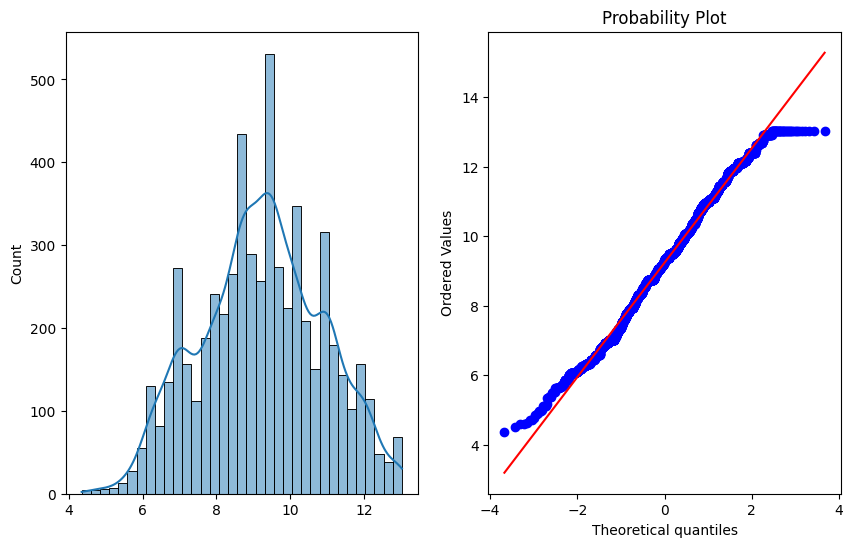

In [104]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(mtr,kde =True)

plt.subplot(1,2,2)
stat.probplot(mtr,plot=plt)
plt.show()

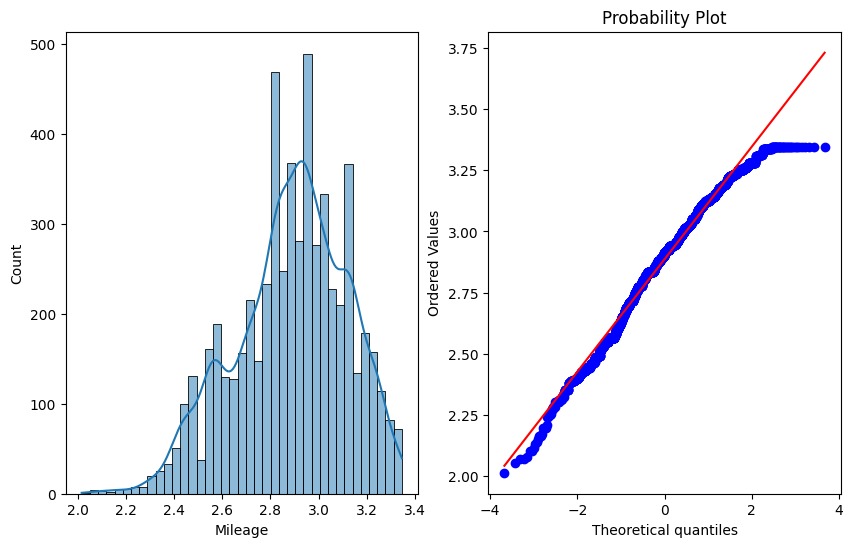

In [105]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(np.log(df['Mileage']),kde =True)

plt.subplot(1,2,2)
stat.probplot(np.log(df['Mileage']),plot=plt)
plt.show()

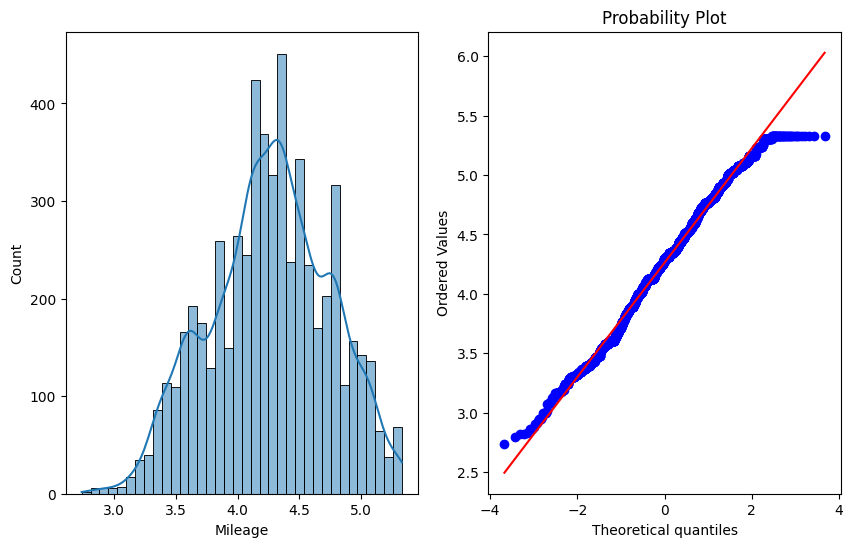

In [106]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(np.sqrt(df['Mileage']),kde =True)

plt.subplot(1,2,2)
stat.probplot(np.sqrt(df['Mileage']),plot=plt)
plt.show()

In [107]:
df['new_milege'] = np.sqrt(df['Mileage'])

In [108]:
df.drop('Mileage',axis=1,inplace=True)

In [109]:
df.head(3)

,Diesel,Petrol,Year,Kilometers_Driven,Owner_Type,Engine,Seats,Price,Manual,company,rename,new_power,new_milege
0,0.0,0.0,2010,72000,1,998.0,5,1.75,1.0,Maruti,Wagon R LXI CNG,3.388271,5.157519
1,1.0,0.0,2015,41000,1,1582.0,5,12.50,1.0,Hyundai,Creta 1.6 CRDi SX Option,3.902102,4.435087
2,0.0,1.0,2011,46000,1,1199.0,5,4.50,1.0,Honda,Jazz V,3.672771,4.266146


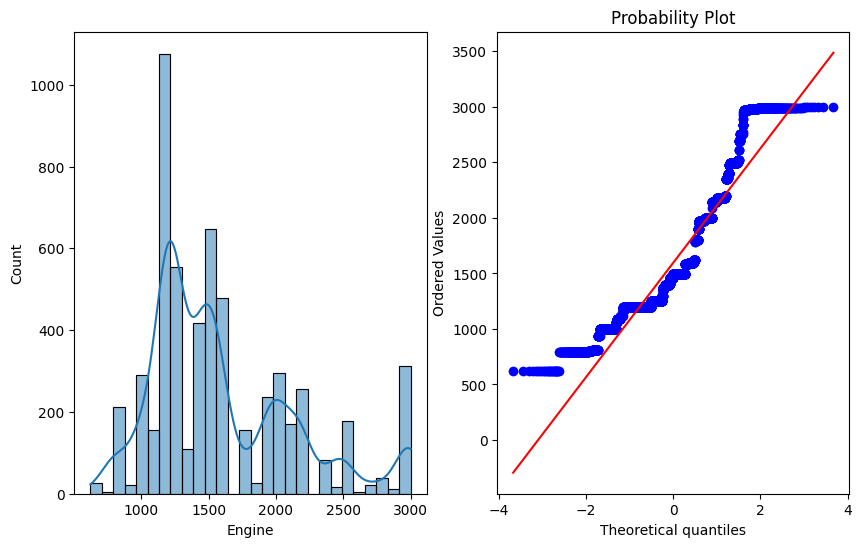

In [110]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(df['Engine'],kde =True)

plt.subplot(1,2,2)
stat.probplot(df['Engine'],plot=plt)
plt.show()

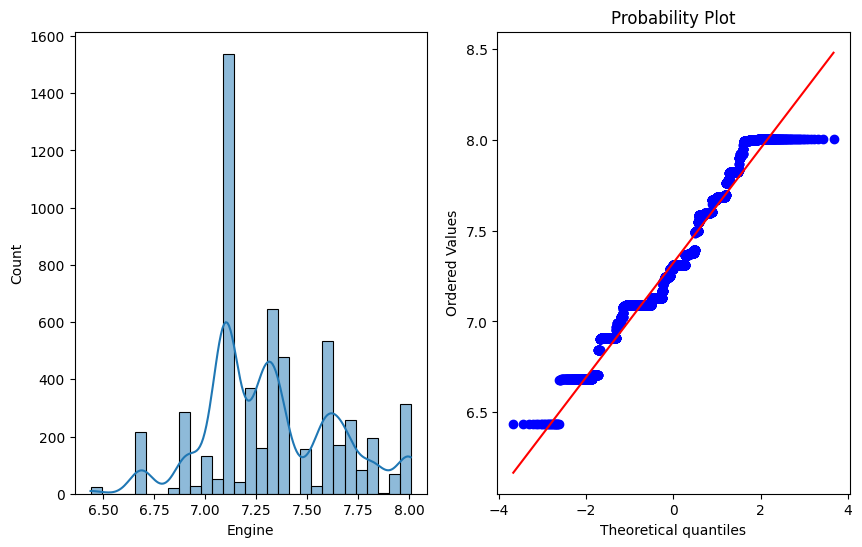

In [111]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(np.log1p(df['Engine']),kde =True)

plt.subplot(1,2,2)
stat.probplot(np.log1p(df['Engine']),plot=plt)
plt.show()

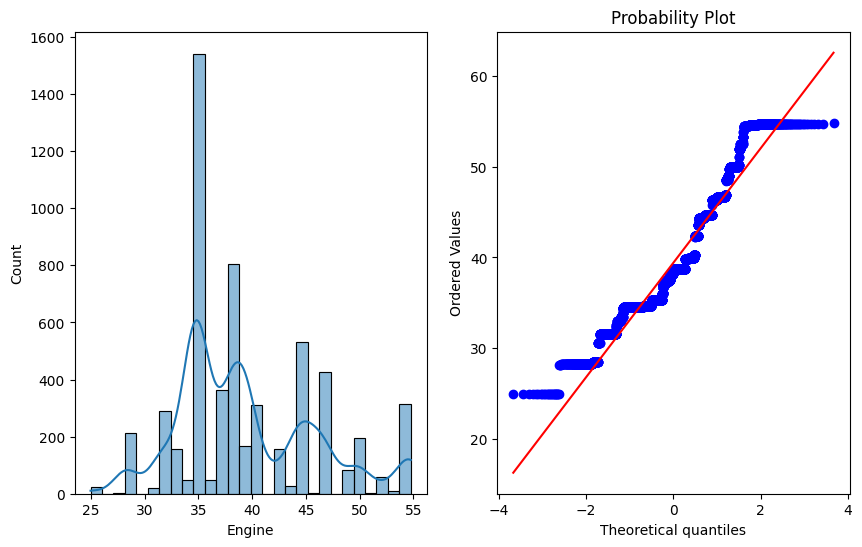

In [112]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(np.sqrt(df['Engine']),kde =True)

plt.subplot(1,2,2)
stat.probplot(np.sqrt(df['Engine']),plot=plt)
plt.show()

In [113]:
etr , elam = boxcox(df['Engine'])

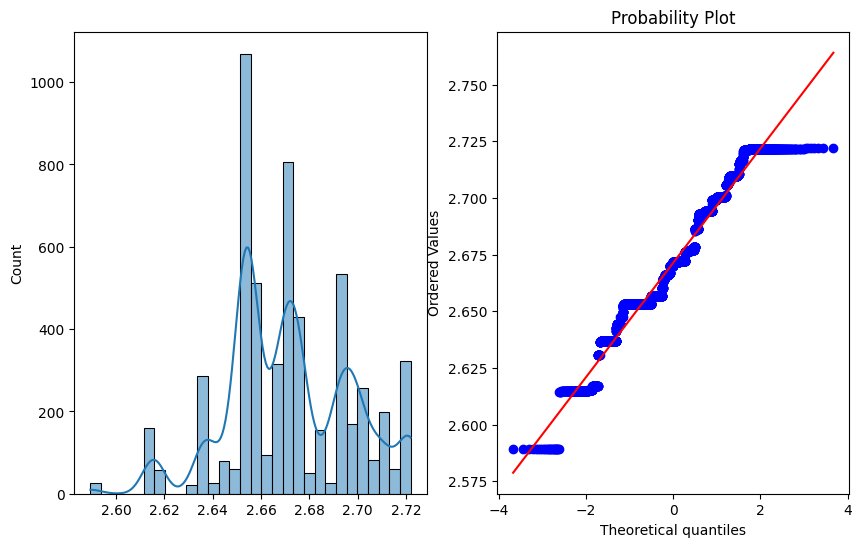

In [114]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(etr,kde =True)

plt.subplot(1,2,2)
stat.probplot(etr,plot=plt)
plt.show()

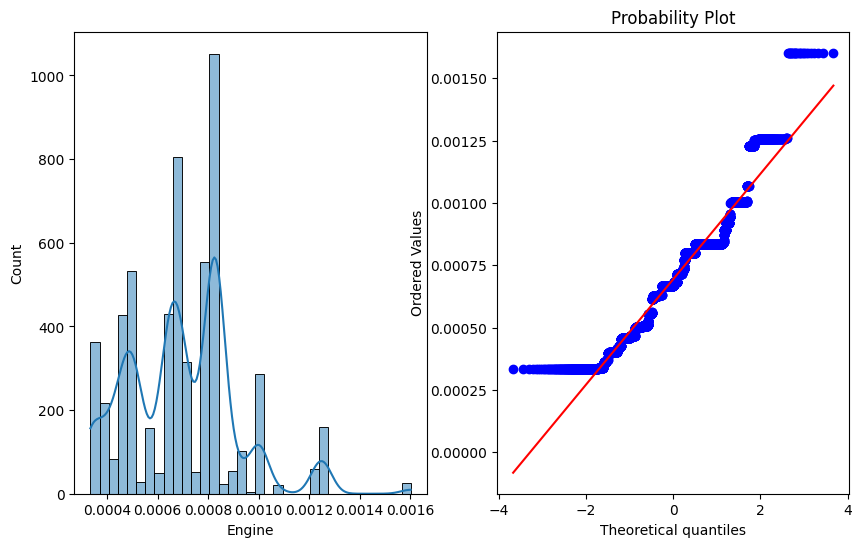

In [115]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(1/df['Engine'],kde =True)

plt.subplot(1,2,2)
stat.probplot(1/df['Engine'],plot=plt)
plt.show()

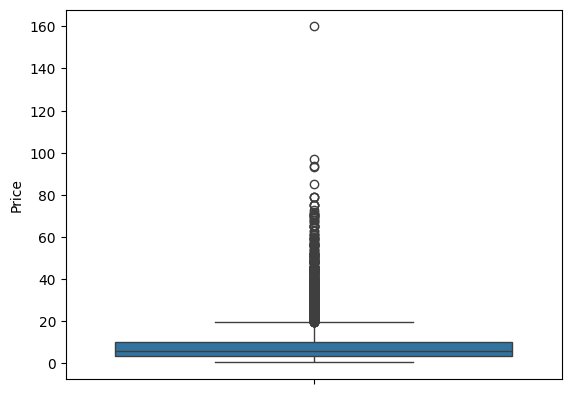

In [116]:
sns.boxplot(df['Price'])
plt.show()


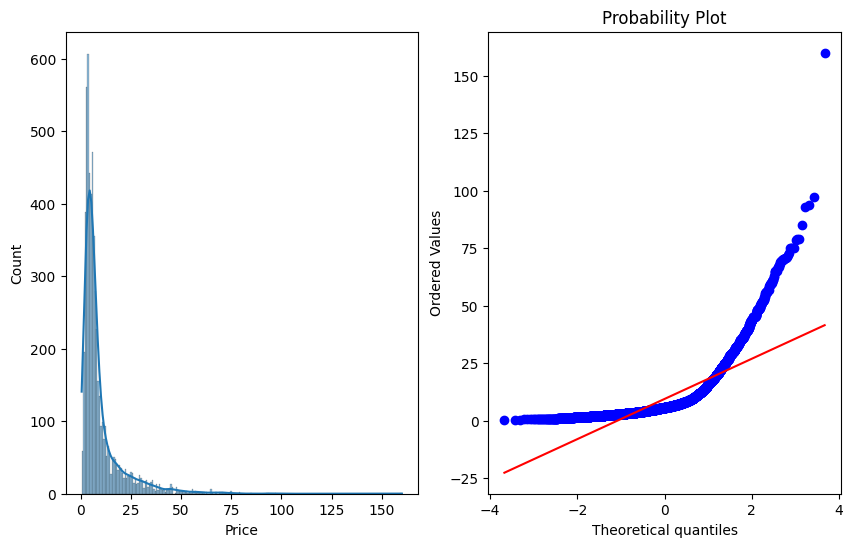

In [117]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(df['Price'],kde =True)

plt.subplot(1,2,2)
stat.probplot(df['Price'],plot=plt)
plt.show()

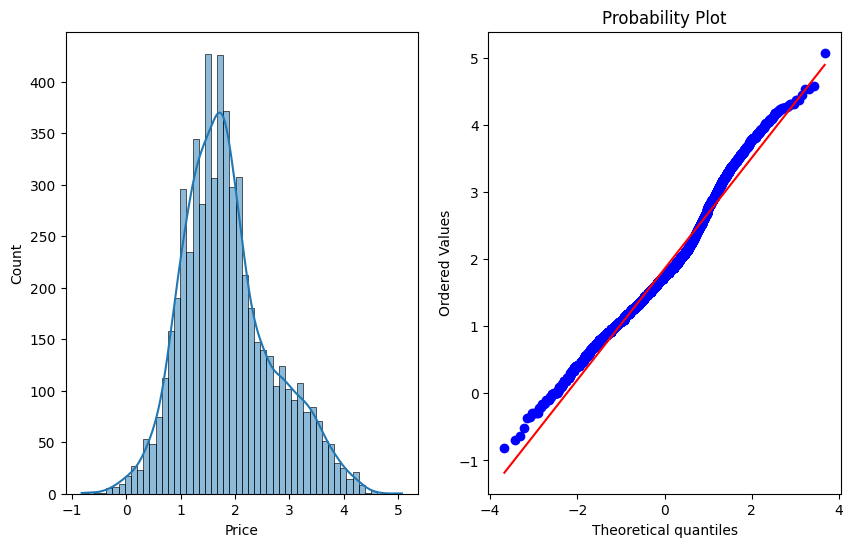

In [118]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(np.log(df['Price']),kde =True)

plt.subplot(1,2,2)
stat.probplot(np.log(df['Price']),plot=plt)
plt.show()

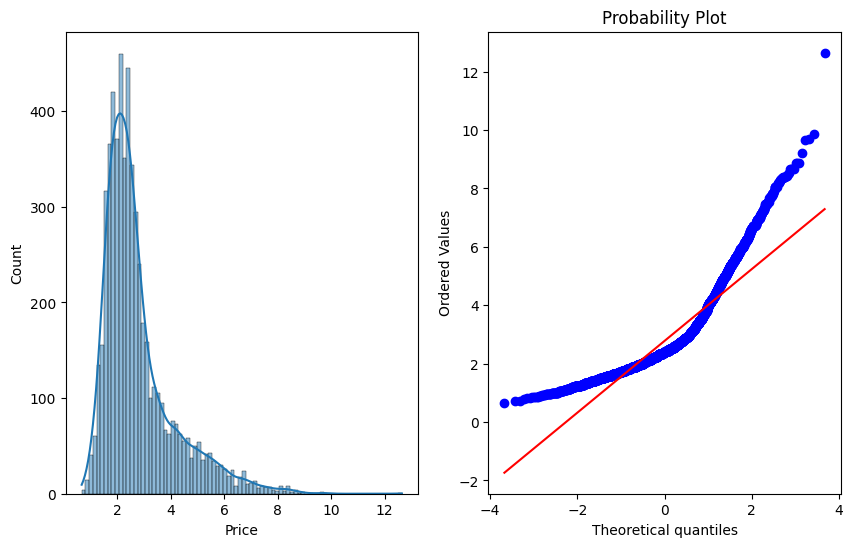

In [119]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(np.sqrt(df['Price']),kde =True)

plt.subplot(1,2,2)
stat.probplot(np.sqrt(df['Price']),plot=plt)
plt.show()

In [120]:
ptrr , plamm = boxcox(df['Price'])

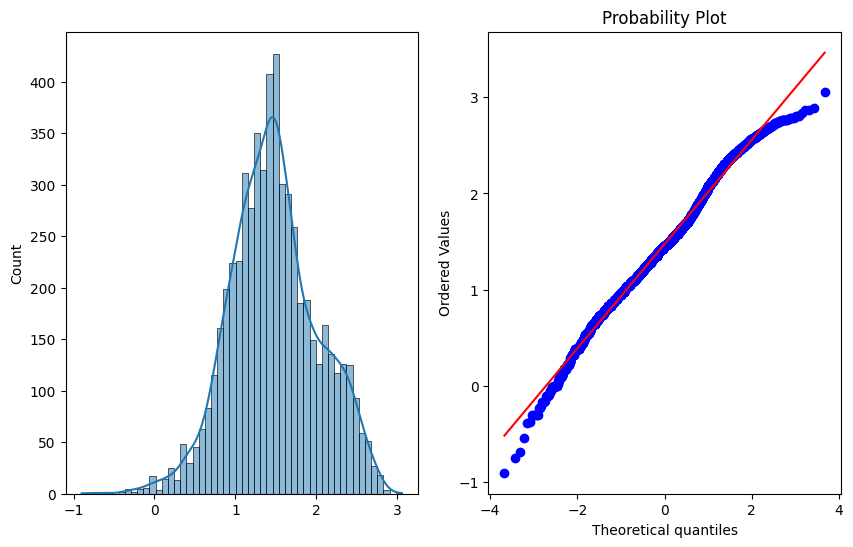

In [121]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(ptrr,kde =True)

plt.subplot(1,2,2)
stat.probplot(ptrr,plot=plt)
plt.show()

In [122]:
df['new_price'] = ptrr

In [123]:
df.drop('Price',axis=1,inplace=True)

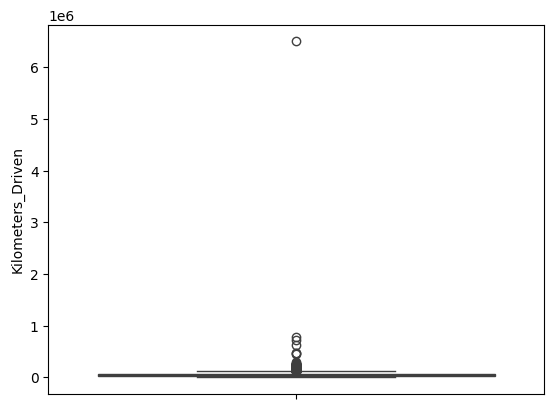

In [124]:
sns.boxplot(df['Kilometers_Driven'])
plt.show()

In [125]:
df.head(2)

,Diesel,Petrol,Year,Kilometers_Driven,Owner_Type,Engine,Seats,Manual,company,rename,new_power,new_milege,new_price
0,0.0,0.0,2010,72000,1,998.0,5,1.0,Maruti,Wagon R LXI CNG,3.388271,5.157519,0.526533
1,1.0,0.0,2015,41000,1,1582.0,5,1.0,Hyundai,Creta 1.6 CRDi SX Option,3.902102,4.435087,1.937676


In [126]:
df['Kilometers_Driven'].quantile(0.99)

170000.0

In [127]:
np.mean(df['Kilometers_Driven'])

57929.99792996377

In [128]:
df = df[~df['Kilometers_Driven'].isin([6500000.0])]

In [129]:
dummy4 = df['Kilometers_Driven']

In [130]:
ls4 = list(map(lambda x : int(dummy4.mean()) if x>200000 else x , dummy4))

In [131]:
df['Kilometers_Driven'] = ls4

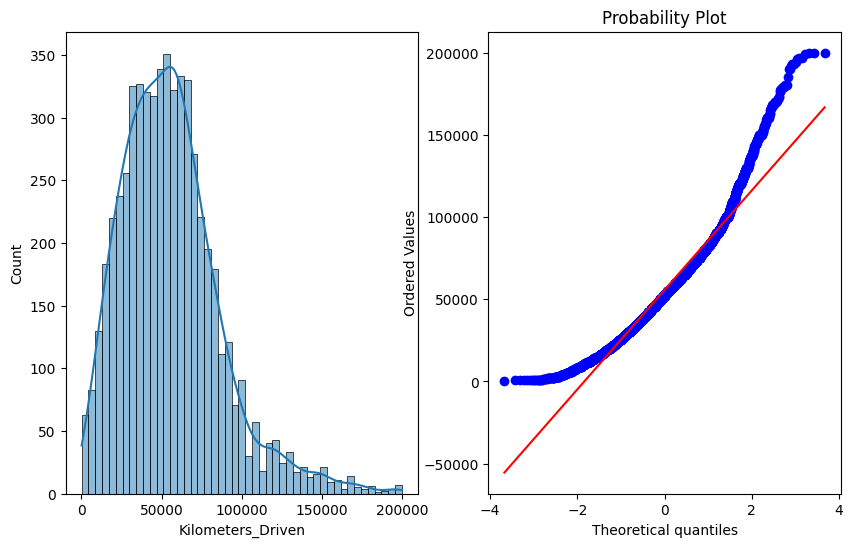

In [132]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(df['Kilometers_Driven'],kde =True)

plt.subplot(1,2,2)
stat.probplot(df['Kilometers_Driven'],plot=plt)
plt.show()

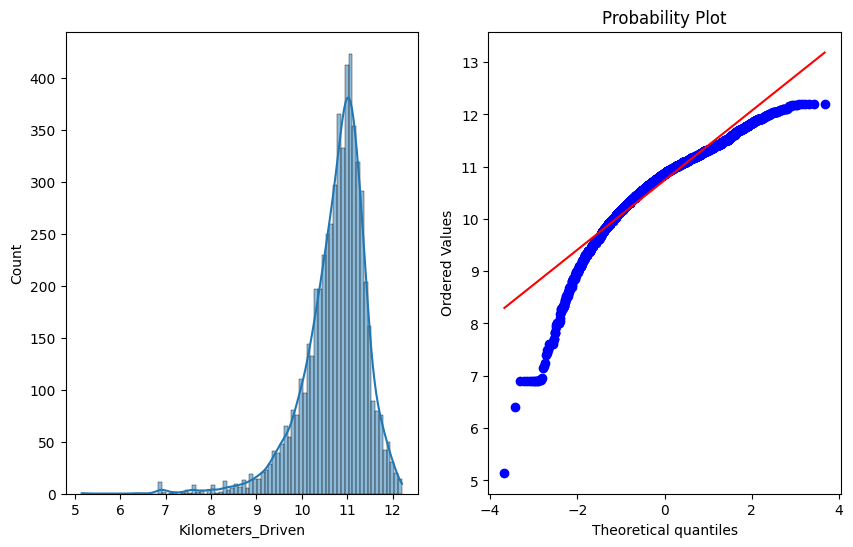

In [133]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(np.log1p(df['Kilometers_Driven']),kde =True)

plt.subplot(1,2,2)
stat.probplot(np.log1p(df['Kilometers_Driven']),plot=plt)
plt.show()

In [134]:
ktr , klam = boxcox(df['Kilometers_Driven'])

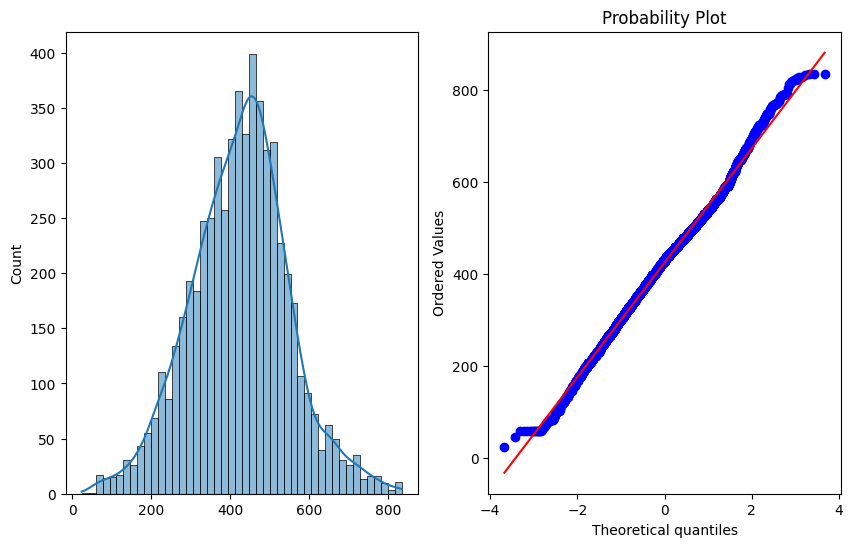

In [135]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(ktr,kde =True)

plt.subplot(1,2,2)
stat.probplot(ktr,plot=plt)
plt.show()

In [136]:
df['new_kilometers'] = ktr

In [137]:
df.drop('Kilometers_Driven',axis=1,inplace=True)

In [138]:
df.head(3)

,Diesel,Petrol,Year,Owner_Type,Engine,Seats,Manual,company,rename,new_power,new_milege,new_price,new_kilometers
0,0.0,0.0,2010,1,998.0,5,1.0,Maruti,Wagon R LXI CNG,3.388271,5.157519,0.526533,503.337374
1,1.0,0.0,2015,1,1582.0,5,1.0,Hyundai,Creta 1.6 CRDi SX Option,3.902102,4.435087,1.937676,380.738182
2,0.0,1.0,2011,1,1199.0,5,1.0,Honda,Jazz V,3.672771,4.266146,1.280516,403.100770


In [139]:
company_dummy = pd.get_dummies(df['company'],drop_first=True,dtype=int)

In [140]:
df = pd.concat([df,company_dummy],axis=1)

In [141]:
df.drop('company',axis=1,inplace=True)

In [142]:
df.head()

,Diesel,Petrol,Year,Owner_Type,Engine,Seats,Manual,rename,new_power,new_milege,...,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes-Benz,Toyota,Volkswagen,others
0,0.0,0.0,2010,1,998.0,5,1.0,Wagon R LXI CNG,3.388271,5.157519,...,0,0,0,0,0,1,0,0,0,0
1,1.0,0.0,2015,1,1582.0,5,1.0,Creta 1.6 CRDi SX Option,3.902102,4.435087,...,0,0,0,1,0,0,0,0,0,0
2,0.0,1.0,2011,1,1199.0,5,1.0,Jazz V,3.672771,4.266146,...,0,0,1,0,0,0,0,0,0,0
3,1.0,0.0,2012,1,1248.0,7,1.0,Ertiga VDI,3.673217,4.557412,...,0,0,0,0,0,1,0,0,0,0
4,1.0,0.0,2013,2,1968.0,5,0.0,A4 New 2.0 TDI Multitronic,3.971797,3.898718,...,0,0,0,0,0,0,0,0,0,0


In [143]:
df.columns

Index(['Diesel', 'Petrol', 'Year', 'Owner_Type', 'Engine', 'Seats', 'Manual',
       'rename', 'new_power', 'new_milege', 'new_price', 'new_kilometers',
       'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
       'Mercedes-Benz', 'Toyota', 'Volkswagen', 'others'],
      dtype='object')

In [144]:
x= df.drop('new_price',axis=1)
x

,Diesel,Petrol,Year,Owner_Type,Engine,Seats,Manual,rename,new_power,new_milege,...,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes-Benz,Toyota,Volkswagen,others
0,0.0,0.0,2010,1,998.0,5,1.0,Wagon R LXI CNG,3.388271,5.157519,...,0,0,0,0,0,1,0,0,0,0
1,1.0,0.0,2015,1,1582.0,5,1.0,Creta 1.6 CRDi SX Option,3.902102,4.435087,...,0,0,0,1,0,0,0,0,0,0
2,0.0,1.0,2011,1,1199.0,5,1.0,Jazz V,3.672771,4.266146,...,0,0,1,0,0,0,0,0,0,0
3,1.0,0.0,2012,1,1248.0,7,1.0,Ertiga VDI,3.673217,4.557412,...,0,0,0,0,0,1,0,0,0,0
4,1.0,0.0,2013,2,1968.0,5,0.0,A4 New 2.0 TDI Multitronic,3.971797,3.898718,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,1.0,0.0,2014,1,1248.0,5,1.0,Swift VDI,3.551989,5.329165,...,0,0,0,0,0,1,0,0,0,0
6015,1.0,0.0,2015,1,1120.0,5,1.0,Xcent 1.1 CRDi S,3.524117,4.939636,...,0,0,0,1,0,0,0,0,0,0
6016,1.0,0.0,2012,2,2498.0,8,1.0,Xylo D4 BSIV,3.825300,3.741657,...,0,0,0,0,1,0,0,0,0,0
6017,0.0,1.0,2013,1,998.0,5,1.0,Wagon R VXI,3.485897,4.347413,...,0,0,0,0,0,1,0,0,0,0


In [145]:
x.columns

Index(['Diesel', 'Petrol', 'Year', 'Owner_Type', 'Engine', 'Seats', 'Manual',
       'rename', 'new_power', 'new_milege', 'new_kilometers', 'BMW', 'Ford',
       'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes-Benz', 'Toyota',
       'Volkswagen', 'others'],
      dtype='object')

In [146]:
y = df['new_price']
y

0       0.526533
1       1.937676
2       1.280516
3       1.480737
4       2.130964
          ...   
6014    1.319119
6015    1.194814
6016    0.949188
6017    0.877153
6018    0.829828
Name: new_price, Length: 5796, dtype: float64

In [147]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [186]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline


In [149]:
ohe = OneHotEncoder()
ohe.fit(x[['rename']])

OneHotEncoder()

In [150]:
ohe.categories_

[array(['1 Series 118d Base', '1 Series 118d Sport Line',
        '3 Series 2005-2011 325i Sedan', ..., 'redi-GO S', 'redi-GO T',
        'redi-GO T Option'], dtype=object)]

In [151]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [152]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['rename']),
                                   (StandardScaler(),['new_power','new_milege','new_kilometers','Year','Engine']) ,
                                       remainder='passthrough')

In [153]:
lr= LinearRegression()

In [154]:
pipe = make_pipeline(column_trans,lr)

In [155]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['1 Series 118d Base', '1 Series 118d Sport Line',
       '3 Series 2005-2011 325i Sedan', ..., 'redi-GO S', 'redi-GO T',
       'redi-GO T Option'], dtype=object)]),
                                                  ['rename']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['new_power', 'new_milege',
                                                   'new_kilometers', 'Year',
                                                   'Engine'])])),
                ('linearregression', LinearRegression())])

In [156]:
y_pred = pipe.predict(x_test)

In [157]:
r2_score(y_test,y_pred)

0.8771928348270291

In [158]:
scores = []
for i in range(1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i)
    lr = LinearRegression()
    pipe = make_pipeline(column_trans,lr)
    pipe.fit(x_train,y_train)
    y_pred= pipe.predict(x_test)
    scores.append(r2_score(y_test,y_pred))

In [159]:
np.argmax(scores)

538

In [160]:
scores[np.argmax(scores)] ## ACCURACY

0.9116364766030522

In [187]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(mse)
print(mae)

0.034342138525077656
0.12400402424002244


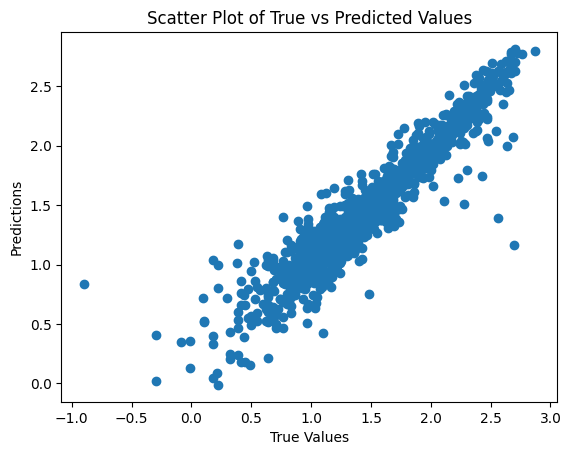

In [188]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Scatter Plot of True vs Predicted Values')
plt.show()

In [161]:
from sklearn.svm import SVR

In [162]:
svm = SVR()

In [163]:
pipe2 = make_pipeline(column_trans,svm)

In [164]:
pipe2.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['1 Series 118d Base', '1 Series 118d Sport Line',
       '3 Series 2005-2011 325i Sedan', ..., 'redi-GO S', 'redi-GO T',
       'redi-GO T Option'], dtype=object)]),
                                                  ['rename']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['new_power', 'new_milege',
                                                   'new_kilometers', 'Year',
                                                   'Engine'])])),
                ('svr', SVR())])

In [165]:
y_pred2 = pipe2.predict(x_test)

In [166]:
svmr2 = r2_score(y_test,y_pred2)

In [167]:
svmr2

0.9105897478030273

In [168]:
x_test.shape

(1160, 21)

In [169]:
1- ((1-svmr2)*(1160-1)/(1160-1-21))

0.9089398222352448

In [189]:
mse = mean_squared_error(y_test,y_pred2)
mae = mean_absolute_error(y_test, y_pred2)
print(mse)
print(mae)

0.026349371440927593
0.11346234717759632


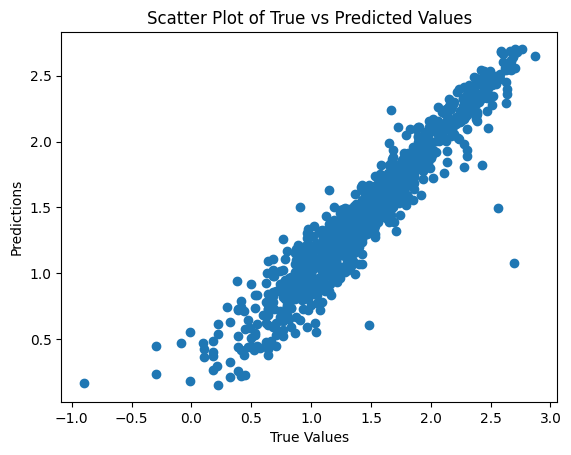

In [190]:
plt.scatter(y_test, y_pred2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Scatter Plot of True vs Predicted Values')
plt.show()

In [170]:
# score = []
# for i in range(1000):
#     x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i)
#     svm = SVR()
#     pipe2 = make_pipeline(column_trans,svm)
#     pipe2.fit(x_train,y_train)
#     y_pred2= pipe2.predict(x_test)
#     score.append(r2_score(y_test,y_pred2))

In [171]:
# score[np.argmax(score)]

In [172]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [173]:
pipe3 = make_pipeline(column_trans,rfr)

In [174]:
pipe3.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['1 Series 118d Base', '1 Series 118d Sport Line',
       '3 Series 2005-2011 325i Sedan', ..., 'redi-GO S', 'redi-GO T',
       'redi-GO T Option'], dtype=object)]),
                                                  ['rename']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['new_power', 'new_milege',
                                                   'new_kilometers', 'Year',
                                                   'Engine'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [175]:
y_pred3 = pipe3.predict(x_test)

In [176]:
r2_score(y_test,y_pred3)

0.9209495375054825

In [177]:
1- ((1-0.922355132112421
)*(1160-1)/(1160-1-21))

0.920922318205884

In [193]:
mse = mean_squared_error(y_test,y_pred3)
mae = mean_absolute_error(y_test, y_pred3)
print(mse)
print(mae)

0.02329632170432107
0.10955484146411047


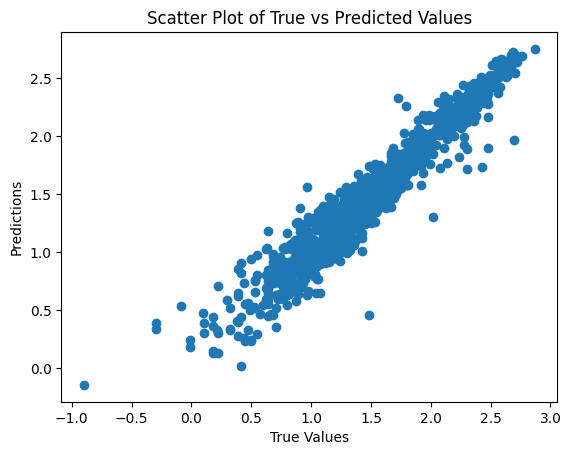

In [191]:
plt.scatter(y_test, y_pred3)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Scatter Plot of True vs Predicted Values')
plt.show()

In [178]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [179]:
pipe4 = make_pipeline(column_trans,knn)

In [180]:
pipe4.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['1 Series 118d Base', '1 Series 118d Sport Line',
       '3 Series 2005-2011 325i Sedan', ..., 'redi-GO S', 'redi-GO T',
       'redi-GO T Option'], dtype=object)]),
                                                  ['rename']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['new_power', 'new_milege',
                                                   'new_kilometers', 'Year',
                                                   'Engine'])])),
                ('kneighborsregressor', KNeighborsRegressor())])

In [181]:
y_pred4 = pipe4.predict(x_test)

In [182]:
r2_score(y_test,y_pred4)

0.9107113455236202

In [194]:
mse = mean_squared_error(y_test,y_pred4)
mae = mean_absolute_error(y_test, y_pred4)
print(mse)
print(mae)

0.026313536361308145
0.1190668385051143


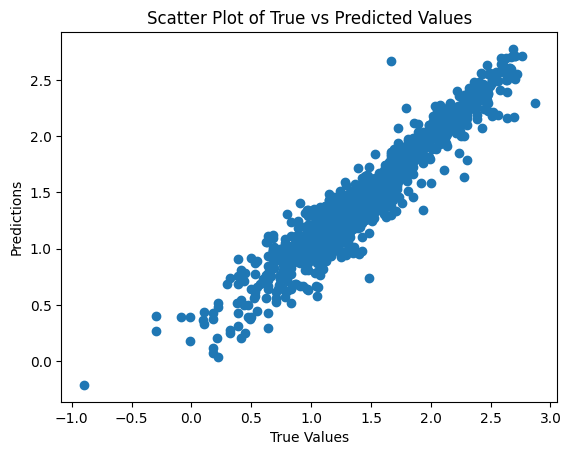

In [192]:
plt.scatter(y_test, y_pred4)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Scatter Plot of True vs Predicted Values')
plt.show()